In [78]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model

In [14]:
train = pd.read_csv('./data/jigsaw-toxic-comment-classification-challenge/train.csv')
test = pd.read_csv('./data/jigsaw-toxic-comment-classification-challenge/test.csv')

In [15]:
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [19]:
test.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [20]:
train.isnull().any(),test.isnull().any()

(id               False
 comment_text     False
 toxic            False
 severe_toxic     False
 obscene          False
 threat           False
 insult           False
 identity_hate    False
 dtype: bool, id              False
 comment_text    False
 dtype: bool)

In [24]:
train.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [42]:
train.shape

(159571, 8)

In [43]:
test.shape

(153164, 2)

In [25]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values
list_sentences_train = train["comment_text"]
list_sentences_test = test["comment_text"]

In [33]:
y[0:7, :]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0]], dtype=int64)

In [35]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [36]:
Tokenizer?

In [37]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [45]:
len(list_tokenized_train[1])

17

In [46]:
from keras.preprocessing.sequence import pad_sequences

In [48]:
maxlen = 200
X_train = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [49]:
X_train.shape

(159571, 200)

In [50]:
X_test.shape

(153164, 200)

In [53]:
print(X_train[:, 1])

[0 0 0 ... 0 0 0]


In [55]:
X_train

array([[    0,     0,     0, ...,  4583,  2273,   985],
       [    0,     0,     0, ...,   589,  8377,   182],
       [    0,     0,     0, ...,     1,   737,   468],
       ...,
       [    0,     0,     0, ...,  3509, 13675,  4528],
       [    0,     0,     0, ...,   151,    34,    11],
       [    0,     0,     0, ...,  1627,  2056,    88]])

In [56]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

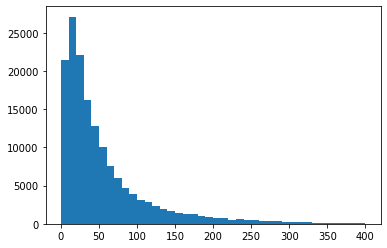

In [60]:
plt.hist(totalNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.show()

In [63]:
pad_sequences?

## Begin to build the model

Input(None, 200) -> Embedding Layer(None, 200, 128) -> LSTM Layer(None, 200, 60) -> Max Pooling(None, 60) -> FC -> FC

In [65]:
inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier

In [67]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [69]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)

In [72]:
x = GlobalMaxPool1D()(x)

In [73]:
x = Dropout(0.1)(x)

In [74]:
x = Dense(50, activation="relu")(x)

In [75]:
x = Dropout(0.1)(x)

In [76]:
x = Dense(6, activation="sigmoid")(x)

In [79]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

W1007 11:59:20.940567 10452 deprecation.py:323] From C:\Users\alex\Anaconda3\envs\cs231n\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [80]:
batch_size = 32
epochs = 2
model.fit(X_train,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

W1007 12:00:08.339810 10452 deprecation_wrapper.py:119] From C:\Users\alex\Anaconda3\envs\cs231n\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 143613 samples, validate on 15958 samples
Epoch 1/2
143613/143613 [==============================] - 469s 3ms/step - loss: 0.0677 - accuracy: 0.9781 - val_loss: 0.0516 - val_accuracy: 0.9810
Epoch 2/2
143613/143613 [==============================] - 469s 3ms/step - loss: 0.0456 - accuracy: 0.9830 - val_loss: 0.0471 - val_accuracy: 0.9826
